In [1]:
from simsopt.saw.stellgap import AlfvenSpecData, plot_continuum
from simsopt.saw.ae3d import continuum_from_ae3d, plot_ae3d_eigenmode, AE3DEigenvector, EigModeASCI
import plotly.io as pio

## Load the AE3D and STELLGAP data, and plot the frequencies overlaid on each other with plotly.

In [2]:
ema = EigModeASCI('ae3d_output')
fig = plot_continuum(
    overlays=[
        AlfvenSpecData.from_dir('stellgap_output').get_modes(),
        continuum_from_ae3d(ema,minevalue=0.0, maxevalue=265**2)
    ]
)
pio.write_html(fig,'overlayed_continua.html',include_mathjax='cdn')
pio.write_image(fig,'overlayed_continua.png',scale=2)

fig

## We choose the mode with a frequency that sits inside the gap near $\omega = 51$ kHz

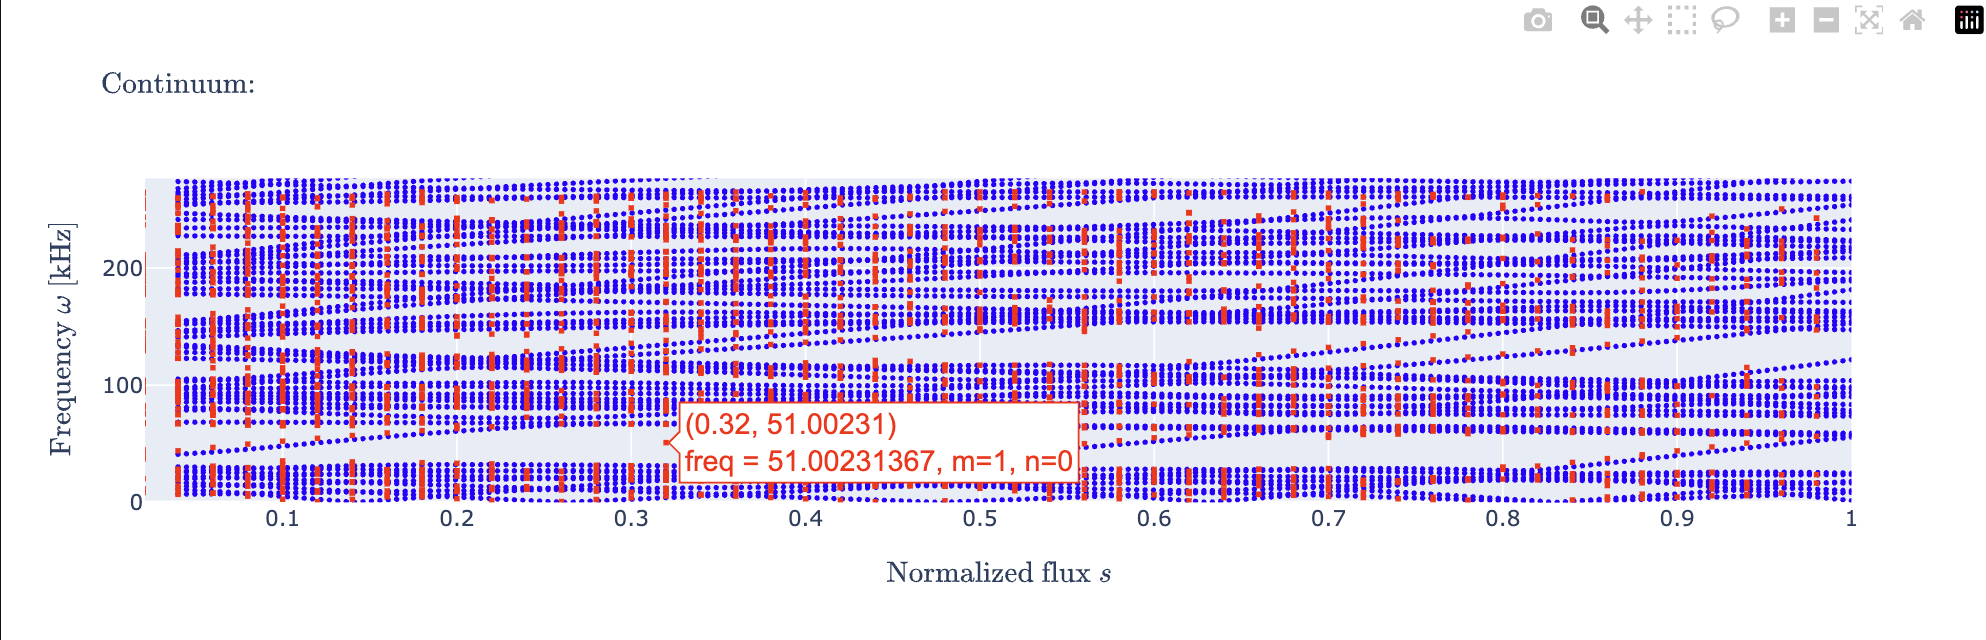

## Provided this frequency, plot the eigenmode structure. (Note that the eigenvalue = $\omega^2$)

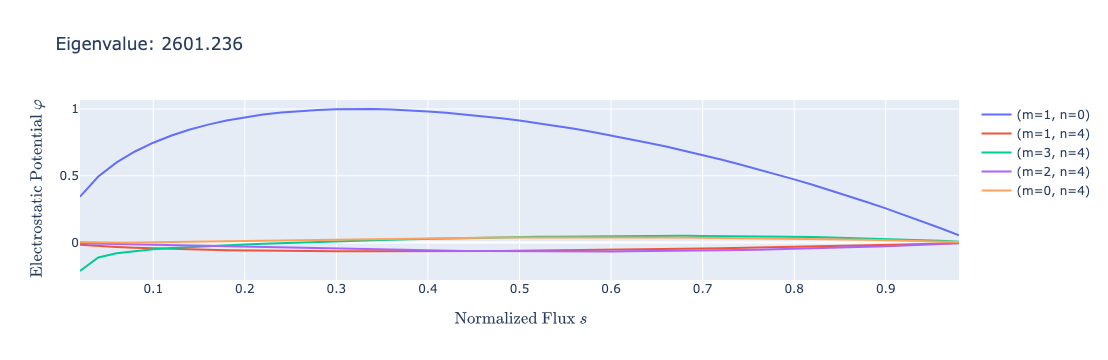

In [3]:
ae_freq = 51.00231
ae = AE3DEigenvector.from_eig_mode_asci(
    eig_mode_asci=ema,
    target_eigenvalue=ae_freq**2
)
fig = plot_ae3d_eigenmode(ae,harmonics=5)
pio.write_html(fig,'AE.html',include_mathjax='cdn')
pio.write_image(fig,'AE.png',scale=2)

fig

## Export the corresponding eigenmode for guiding center tracing. Here, we only save the 5 largest harmonics. 

In [4]:
ae.export_to_numpy('ae',num_harmonics=5,resolution_step=1)

Harmonics exported to ae
